In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [58]:
iris = load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['sepal_length','sepal_width','petal_length','peta-width']
y = pd.DataFrame(iris.target)
y.columns = ['Species']
data = pd.concat([X,y],axis = 1)
data.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
peta-width      0
Species         0
dtype: int64

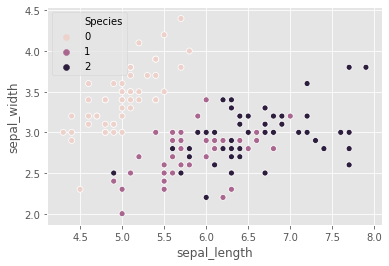

In [53]:
sns.scatterplot(x = data.sepal_length,y = data.sepal_width,hue=data.Species)
plt.show()

In [68]:
X = iris.data
y = iris.target

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [69]:
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [74]:
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [75]:
eigen_vec_svd,s , v = np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [78]:
for val in eigen_values:
    print(val)

2.938085050199994
0.9201649041624863
0.14774182104494757
0.020853862176462637


In [81]:
var_explained = [(i/sum(eigen_values)) * 100 for i in eigen_values]
var_explained

[72.96244541329989, 22.850761786701757, 3.668921889282867, 0.5178709107154891]

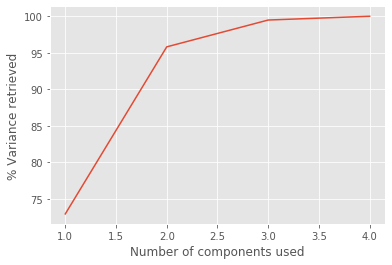

In [83]:
sns.lineplot(x = [1,2,3,4],y = np.cumsum(var_explained))
plt.xlabel("Number of components used")
plt.ylabel("% Variance retrieved")
plt.show()

In [86]:
projection_matrix = eigen_vectors[:,0:2]
projection_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [87]:
X_pca = X.dot(projection_matrix)

In [88]:
X_pca

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,